In [10]:
import torch
from torch import nn
import torch.optim as opt
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
# Generalized class for ANN_X
class ANN(nn.Module):
  def __init__(self, input_size, num_classes, hidden_layers, hidden_sizes):
        super(ANN, self).__init__()
        self.input_size = input_size
        self.num_classes = num_classes
        self.num_hidden = hidden_layers
        self.hidden_sizes = hidden_sizes
        
        self.layers = nn.ModuleList()
        
        self.layers.append(nn.Linear(self.input_size, self.hidden_sizes[0]))
        self.layers.append(nn.ReLU())

        for i in range(self.num_hidden - 1):
          self.layers.append(nn.Linear(self.hidden_sizes[i], self.hidden_sizes[i+1]))
          self.layers.append(nn.ReLU())
        
        self.layers.append(nn.Linear(self.hidden_sizes[self.num_hidden-1], self.num_classes))
    
  def forward(self, x):
      for layer in self.layers:
          x = layer(x)
      return x

  def describeANN(self):
    print("Input size: ",self.input_size)
    print("Classes: ", self.num_classes)
    print("Number of hidden layers: ",self.num_hidden)
    print("Hidden layer sizes: ", self.hidden_sizes)
    print("==========Network Architecture===========")
    return self.modules

  def train(self, train_loader, test_loader, epochs, optim, losscriterion, lr):
    self.val_acc = []
    self.prec = []
    self.recall = []
    self.f1_score = []

    optimizer = ()
    if optim=='SGD':
      optimizer = opt.SGD(self.parameters(), lr=lr)
    
    Closs = ()
    if losscriterion == 'CrossEntropy':
      Closs = nn.CrossEntropyLoss()

    val_acc = []
    for epoch in range(epochs):
      losses = []
      # Training Phase
      for batch in train_loader:
        x, y = batch

        # x is set of images like b x 1 x 28 x 28 (1 is for channels)
        # print(x.size())
        x = x.view(x.size(0), -1)

        # 1. Forward
        logit = self(x)
        # 2. Loss
        loss = Closs(logit, y)
        # 3. Clearing gradients of previous batch to update weights correctly
        self.zero_grad()
        # 4. Partial derivatives calculations
        loss.backward() # params.grad._sum(d(loss)/d(params))
        # 5. Back propogate
        optimizer.step() # params = params - eta * params.grad
        losses.append(loss.item())

      print("Epoch: ", epoch + 1, " train loss: ",round(torch.tensor(losses).mean().item(),4), end=" ")
      y_true = []
      y_pred = []
      with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.reshape(-1, 784)
                outputs = self(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                # print("Predicted: ",predicted)
                # print("Labels", labels)
                y_true += labels.tolist()
                y_pred += predicted.tolist()
                correct += (predicted == labels).sum().item()

            accuracy = 100 * correct / total
            print('Val Accuracy: {} %'.format(accuracy))
            self.val_acc.append(accuracy_score(y_true, y_pred))
            self.prec.append(precision_score(y_true, y_pred, average='macro'))
            self.recall.append(recall_score(y_true, y_pred, average='macro'))
            self.f1_score.append(f1_score(y_true, y_pred, average='macro'))
    print(classification_report(y_true, y_pred))

  def print_metrics(self):
    print("Avg. Val accuracies: ", np.mean(self.val_acc))
    print("Precision: ",np.mean(self.prec))
    print("Recall: ",np.mean(self.recall))
    print("F1-score: ",np.mean(self.f1_score))

In [ ]:
# ANN_3 = ANN(784, 10, 3, [512,256,128])
# ANN_3.describeANN()

Input size:  784
Classes:  10
Number of hidden layers:  3
Hidden layer sizes:  [512, 256, 128]
==========Network Architecture===========


<bound method Module.modules of ANN(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)>

In [ ]:
# model = nn.Sequential(
#     nn.Linear(28*28, 512),
#     nn.ReLU(),
#     nn.Linear(512,256),
#     nn.ReLU(),
#     nn.Linear(256,64),
#     nn.ReLU(),
#     nn.Linear(64,10)
# )

In [ ]:
# model.modules

In [ ]:
# # optimizer
# optimizer = opt.SGD(ANN_3.parameters(), lr=1e-2)
# optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
# # loss function
# CELoss = nn.CrossEntropyLoss()
# CELoss

CrossEntropyLoss()

In [4]:
transform = transforms.Compose([transforms.ToTensor()])
# Loading data
dataset =  datasets.MNIST('data', train=True, download=True, transform=transform)
train, val = random_split(dataset, [55000, 5000])
train_loader = DataLoader(train, batch_size=64)
test_loader = DataLoader(val, batch_size=64)

100%|██████████| 9912422/9912422 [00:04<00:00, 2226747.95it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 14431223.95it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



100%|██████████| 1648877/1648877 [00:01<00:00, 937410.77it/s] 


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 4575054.94it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [5]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

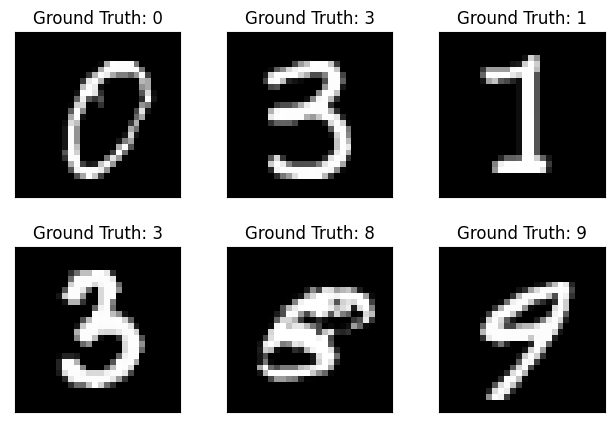

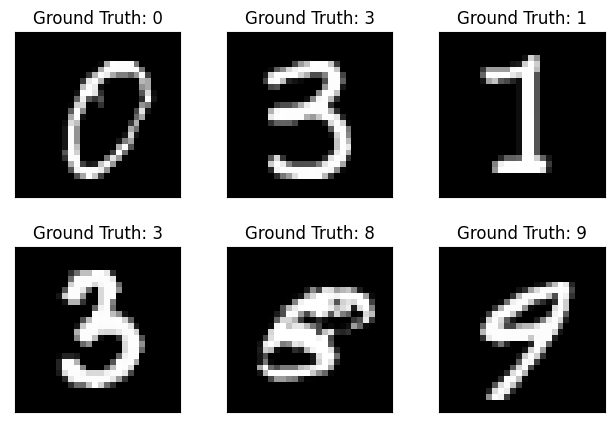

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [7]:
import seaborn as sns

def plot_metrics(title, val_acc, prec, recall, f1_score):
  x = [i+1 for i in range(len(val_acc))]
  print("Performace metrics for ",title)
  plt.figure(figsize=(28,6))
  plt.subplot(1,4,1)
  plt.xlabel("Epochs")
  plt.ylabel("Validation Accuracy")
  sns.lineplot(y=val_acc,x=x)

  plt.subplot(1,4,2)
  plt.xlabel("Epochs")
  plt.ylabel("Precision")
  sns.lineplot(y=prec,x=x)

  plt.subplot(1,4,3)
  plt.xlabel("Epochs")
  plt.ylabel("Recall")
  sns.lineplot(y=recall,x=x)

  plt.subplot(1,4,4)
  plt.xlabel("Epochs")
  plt.ylabel("Recall")
  sns.lineplot(y=f1_score,x=x)

In [14]:
# ANN with 3 hidden layers
ANN_3 = ANN(784, 10, 3, [512,256,128])
ANN_3.train(train_loader, test_loader, 10, 'SGD', 'CrossEntropy', 1e-2)

Epoch:  1  train loss:  2.248 Val Accuracy: 58.72 %


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  2  train loss:  1.1868 Val Accuracy: 84.82 %
Epoch:  3  train loss:  0.4562 Val Accuracy: 88.82 %
Epoch:  4  train loss:  0.3701 Val Accuracy: 90.14 %
Epoch:  5  train loss:  0.3297 Val Accuracy: 90.94 %
Epoch:  6  train loss:  0.2989 Val Accuracy: 91.88 %
Epoch:  7  train loss:  0.2722 Val Accuracy: 92.34 %
Epoch:  8  train loss:  0.2479 Val Accuracy: 92.82 %
Epoch:  9  train loss:  0.226 Val Accuracy: 93.64 %
Epoch:  10  train loss:  0.2064 Val Accuracy: 94.02 %
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       550
           1       0.95      0.99      0.97       554
           2       0.97      0.93      0.95       461
           3       0.91      0.93      0.92       490
           4       0.90      0.95      0.93       468
           5       0.92      0.90      0.91       447
           6       0.96      0.96      0.96       481
           7       0.95      0.97      0.96       511
           8       0.94      0.89   

In [11]:
ANN_3.print_metrics()

Avg. Val accuracies:  0.8703200000000001
Precision:  0.8708545502481162
Recall:  0.8677161188002123
F1-score:  0.8590833766944808


Performace metrics for  ANN_3


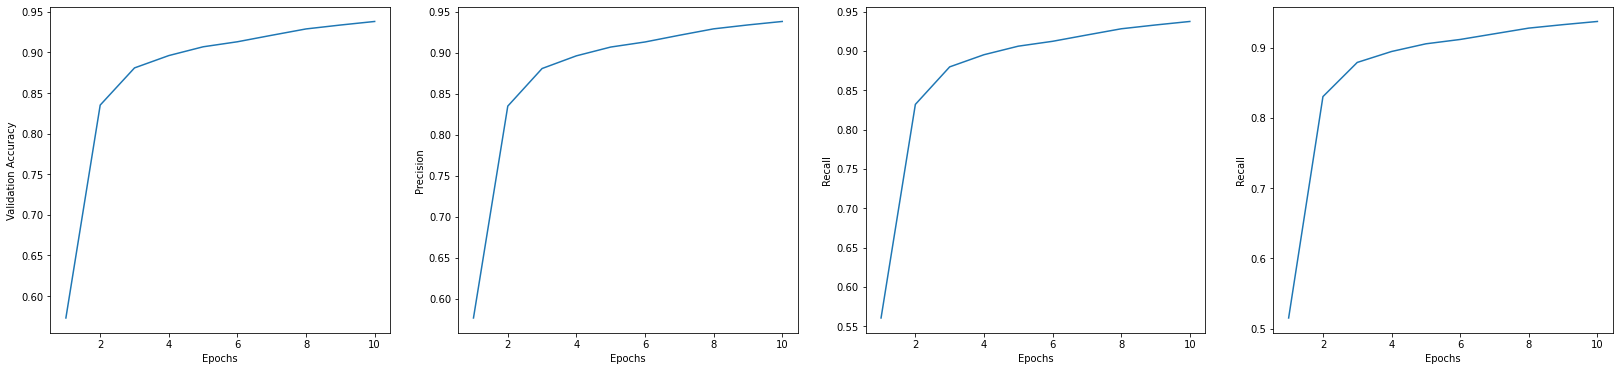

In [ ]:
plot_metrics('ANN_3', ANN_3.val_acc, ANN_3.prec, ANN_3.recall, ANN_3.f1_score)

Epoch:  1  train loss:  2.2951 Val Accuracy: 11.2 %


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  2  train loss:  2.2272 Val Accuracy: 36.46 %


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  3  train loss:  1.2905 Val Accuracy: 76.84 %
Epoch:  4  train loss:  0.5985 Val Accuracy: 85.0 %
Epoch:  5  train loss:  0.4603 Val Accuracy: 88.8 %
Epoch:  6  train loss:  0.3622 Val Accuracy: 90.78 %
Epoch:  7  train loss:  0.2986 Val Accuracy: 92.08 %
Epoch:  8  train loss:  0.2548 Val Accuracy: 93.14 %
Epoch:  9  train loss:  0.22 Val Accuracy: 93.84 %
Epoch:  10  train loss:  0.1919 Val Accuracy: 94.5 %
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       550
           1       0.95      0.98      0.97       554
           2       0.94      0.94      0.94       461
           3       0.94      0.92      0.93       490
           4       0.90      0.96      0.93       468
           5       0.93      0.92      0.92       447
           6       0.97      0.96      0.97       481
           7       0.96      0.96      0.96       511
           8       0.94      0.93      0.93       495
           9       0.94      0.90      

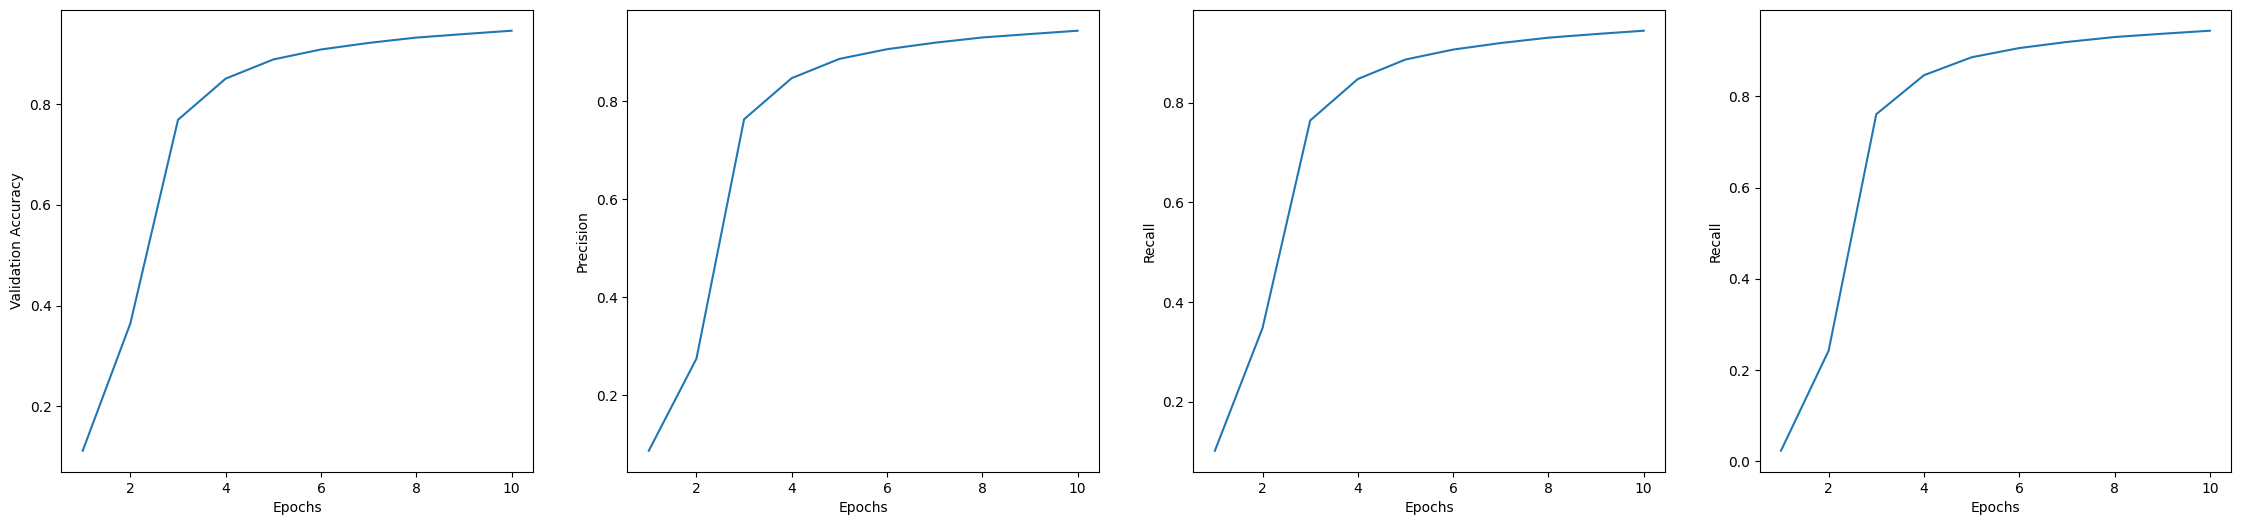

In [12]:
# ANN with 4 hidden layers
ANN_4 = ANN(784, 10, 4, [512,256,128,64])
ANN_4.train(train_loader, test_loader, 10, 'SGD', 'CrossEntropy', 1e-2)
ANN_4.print_metrics()
plot_metrics('ANN_4', ANN_4.val_acc, ANN_4.prec, ANN_4.recall, ANN_4.f1_score)

Epoch:  1  train loss:  2.3011 Val Accuracy: 11.08 %


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  2  train loss:  2.2972 Val Accuracy: 11.08 %


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  3  train loss:  2.2867 Val Accuracy: 19.66 %


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  4  train loss:  2.1507 Val Accuracy: 27.48 %


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  5  train loss:  1.5198 Val Accuracy: 61.6 %
Epoch:  6  train loss:  0.7429 Val Accuracy: 84.96 %
Epoch:  7  train loss:  0.465 Val Accuracy: 88.26 %
Epoch:  8  train loss:  0.3628 Val Accuracy: 90.76 %
Epoch:  9  train loss:  0.2872 Val Accuracy: 92.42 %
Epoch:  10  train loss:  0.2323 Val Accuracy: 93.52 %
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       550
           1       0.96      0.98      0.97       554
           2       0.94      0.93      0.94       461
           3       0.91      0.92      0.92       490
           4       0.91      0.93      0.92       468
           5       0.90      0.92      0.91       447
           6       0.96      0.96      0.96       481
           7       0.96      0.95      0.96       511
           8       0.91      0.91      0.91       495
           9       0.93      0.87      0.90       543

    accuracy                           0.94      5000
   macro avg       0.93      0.93

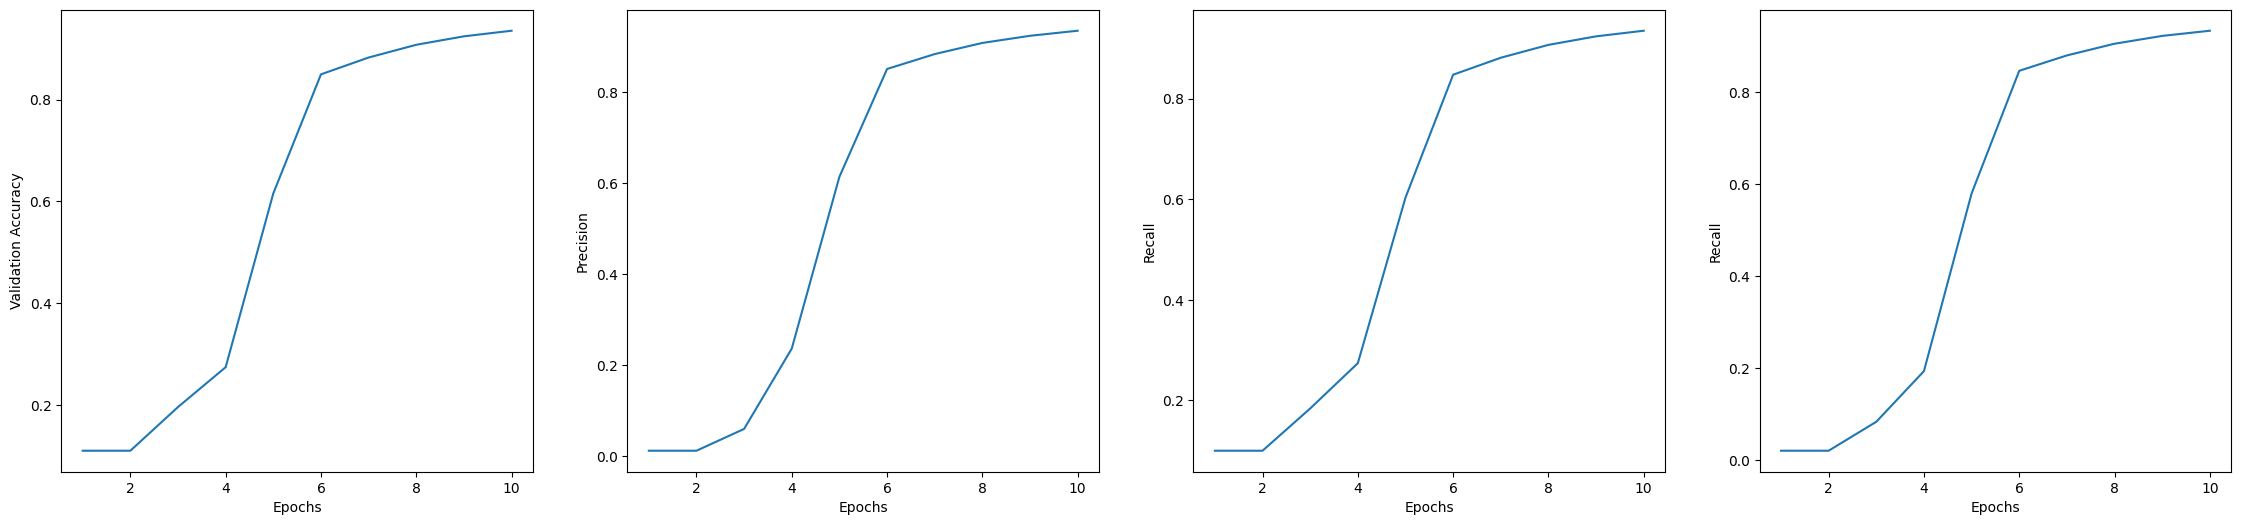

In [13]:
# ANN with 5 hidden layers
ANN_5 = ANN(784, 10, 5, [512,256,128,64,32])
ANN_5.train(train_loader, test_loader, 10, 'SGD', 'CrossEntropy', 1e-2)
ANN_5.print_metrics()
plot_metrics('ANN_5', ANN_5.val_acc, ANN_5.prec, ANN_5.recall, ANN_5.f1_score)